In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from ydata_profiling import ProfileReport

file = pd.read_csv(r"C:\Users\belve\Downloads\African_crises_dataset.csv")
file_copy = file.copy()
file.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [3]:
report = ProfileReport(file, title="African_crises_dataset Report")
report.to_file('African_crises_dataset Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
def  outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outliers_index = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return outliers_index

In [5]:
outliers_index_list = []
for feature in ['exch_usd','inflation_annual_cpi']:
    outliers_index_list.extend(outliers(file, feature))

In [6]:
outliers_index_list

[61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 686,
 687

In [7]:
len(outliers_index_list)

322

In [8]:
no_duplicates = set(outliers_index_list)
len(no_duplicates)

302

In [9]:
def drop_rows_with_outliers(df, list):
    df = df.drop(list)
    return df

In [10]:
cleaned_file = drop_rows_with_outliers(file, no_duplicates)

In [11]:
cleaned_file

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,5.226400e-02,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,5.279800e-02,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,5.227400e-02,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,5.168000e-02,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,5.130800e-02,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,70,ZWE,Zimbabwe,1991,0,5.040000e-26,0,0,0.0,24.000000,1,1,1,no_crisis
1039,70,ZWE,Zimbabwe,1994,0,8.380000e-26,0,0,0.0,21.113543,1,1,1,no_crisis
1040,70,ZWE,Zimbabwe,1995,1,9.310000e-26,0,0,0.0,25.808740,1,0,1,crisis
1041,70,ZWE,Zimbabwe,1996,1,1.080000e-25,0,0,0.0,16.400284,1,1,0,crisis


In [12]:
cleaned_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 1042
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   757 non-null    int64  
 1   country_code                     757 non-null    object 
 2   country                          757 non-null    object 
 3   year                             757 non-null    int64  
 4   systemic_crisis                  757 non-null    int64  
 5   exch_usd                         757 non-null    float64
 6   domestic_debt_in_default         757 non-null    int64  
 7   sovereign_external_debt_default  757 non-null    int64  
 8   gdp_weighted_default             757 non-null    float64
 9   inflation_annual_cpi             757 non-null    float64
 10  independence                     757 non-null    int64  
 11  currency_crises                  757 non-null    int64  
 12  inflation_crises     

In [13]:
cleaned_file['banking_crisis'] = cleaned_file['banking_crisis'].map({'crisis':1,'no_crisis':0})

In [15]:
cleaned_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 1042
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   757 non-null    int64  
 1   country_code                     757 non-null    object 
 2   country                          757 non-null    object 
 3   year                             757 non-null    int64  
 4   systemic_crisis                  757 non-null    int64  
 5   exch_usd                         757 non-null    float64
 6   domestic_debt_in_default         757 non-null    int64  
 7   sovereign_external_debt_default  757 non-null    int64  
 8   gdp_weighted_default             757 non-null    float64
 9   inflation_annual_cpi             757 non-null    float64
 10  independence                     757 non-null    int64  
 11  currency_crises                  757 non-null    int64  
 12  inflation_crises     

In [16]:
x = cleaned_file.drop(columns = ['country_number', 'country_code', 'country', 'year', 'systemic_crisis'], axis=1)

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 1042
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   exch_usd                         757 non-null    float64
 1   domestic_debt_in_default         757 non-null    int64  
 2   sovereign_external_debt_default  757 non-null    int64  
 3   gdp_weighted_default             757 non-null    float64
 4   inflation_annual_cpi             757 non-null    float64
 5   independence                     757 non-null    int64  
 6   currency_crises                  757 non-null    int64  
 7   inflation_crises                 757 non-null    int64  
 8   banking_crisis                   757 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 59.1 KB


In [18]:
y = cleaned_file['systemic_crisis']
y

0       1
1       0
2       0
3       0
4       0
       ..
1036    0
1039    0
1040    1
1041    1
1042    1
Name: systemic_crisis, Length: 757, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=10)
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print('Score = ', model.score(x_test, y_test))

Score =  0.9802631578947368


<Axes: xlabel='inflation_annual_cpi', ylabel='systemic_crisis'>

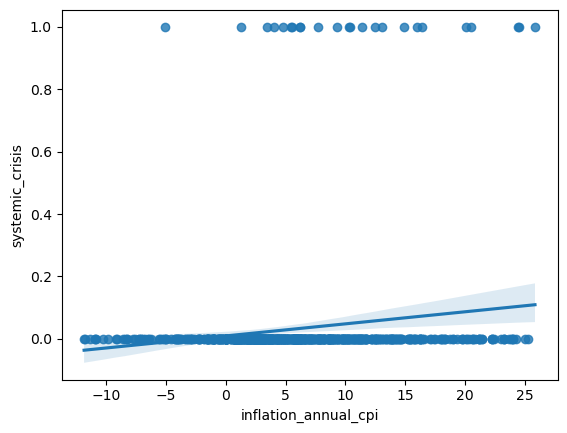

In [37]:
sns.regplot(x='inflation_annual_cpi', y='systemic_crisis', data=cleaned_file)